# Video Game Sales Analysis
### Data analytics of global video game sales from 1980-2020

This notebook analyzes a dataset of over 16,000 video games to explore sales trends across platforms, regions, genres and publishers. The dataset was sourced from [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales).

## Questions This Analysis Answers
1. What are the top selling games by platform?
2. What year had the highest global sales?
3. What was the highest selling game by region?
4. What was the highest selling game globally?
5. Which platform sold the most games overall?
6. Which genre was most popular by region?
7. How did global sales trend over time?

## Setup

This notebook can be run in two ways:

**Option 1: Local CSV (Recommended)**
The dataset is included in the `data/` directory. No setup required.

**Option 2: Kaggle API**
Requires a Kaggle account and API Token.
1. Copy `.env.example` to `.env`
2. Add your Kaggle API token to `.env`
3. Uncomment the API section in the imports cell below

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load Data

# Option 1: Kaggle API 
# Requires a Kaggle account and API token stored in a .env file
# Copy .env.example to .env and add your token before uncommenting
# from dotenv import load_dotenv
# import kagglehub
# load_dotenv()
# path = kagglehub.dataset_download("gregorut/videogamesales")
# df = pd.read_csv(path + "/vgsales.csv")

# --- Option 2: Local CSV (default) ---
df = pd.read_csv("../data/vgsales.csv")

print("Dataset loaded successfully")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully
Shape: 16598 rows, 11 columns


In [9]:
pd.set_option("display.max_colwidth",None)

## Data Exploration
Before analyzing the data, you'll want to examine its structure, data types, and check for missing values.

In [4]:
# Display first 5 rows to verify data integrity
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Check data types and null counts
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  str    
 2   Platform      16598 non-null  str    
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  str    
 5   Publisher     16540 non-null  str    
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), str(4)
memory usage: 1.4 MB


In [ ]:
# Summary statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
# Check for missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Cleaning
The exploration above revealed the following issues that need to be addressed before analysis:
- **Year** has 271 missing values and is data type float64 but should be integer
- **Publisher** has 58 missing values

Now you'll drop rows with missing Year and Publisher values, then convert Year to integer.

In [3]:
# Drop rows with missing Year and Publisher values
df = df.dropna(subset=["Year", "Publisher"])

# Convert Year from float64 to integer
df["Year"] = df["Year"].astype(int)

# Verify there are no more null values
print("Remaining null values:")
print(df.isnull().sum())
print(f"\nShape after cleaning: {df.shape[0]} rows, {df.shape[1]} columns")

Remaining null values:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Shape after cleaning: 16291 rows, 11 columns


In [28]:
regions = { # A dictionary containing all of the regions listed in the dataset.
    "NA_Sales" : "North America",
    "EU_Sales" : "Europe",
    "JP_Sales" : "Japan",
    "Other_Sales" : "Other",
    "Global_Sales" : "Global Sales"
}

## Analysis

### Question 1: What is the highest selling game globally?

In [ ]:
top_game_global = df.loc[df["Global_Sales"].idxmax()]

print("Highest Selling Game Globally:")
print(f"Game Title: {top_game_global['Name']}")
print(f"Platform: {top_game_global['Platform']}")
print(f"Year: {top_game_global['Year']}")
print(f"Publisher: {top_game_global['Publisher']}")
print(f"Sales: {top_game_global['Global_Sales']}M copies")

Highest Selling Game Globally:
Game Title: Wii Sports
Platform: Wii
Year: 2006.0
Publisher: Nintendo
Sales: 82.74M copies


### Question 1 Observation:
Wii sports was the highest selling game of all time, getting its largest yearly sales in 2006 at 82.74 million copies.

### Question 2: Which platform sold the most games overall?

In [ ]:
top_platform = df.groupby("Platform")["Global_Sales"].sum().idxmax() # Groups data by Platform then sums the Global_Sales and outputs the Platform value
print(f"{top_platform} sold the most games globally.")

PS2 sold the most games globally.


### Question 2 Observation:
The PS2 holds the record for highest total game sales of any platform. As it should given that it has the largest game library of any console in history.

### Question 3: What year had the highest global sales?

In [ ]:
top_year = df.groupby("Year")["Global_Sales"].sum().idxmax() # Groups data by Year then sums the Global_Sales and outputs the Year value
print(f"The most games were sold globally in {top_year}.")

The most games were sold globally in 2008.


### Question 3 Observation:
2008 had the highest volume of games sold globally. Largely due to the Wii's dominance in the market and the explosion in popularity of the Call of Duty franchise.

### Question 4: What was the highest selling game by region?

In [29]:
for col, region in regions.items(): # Iterates over the data for each region and finds the highest selling game in that region.
    top_game = df.loc[df[col].idxmax(),"Name"]
    top_game_sales = df[col].max()
    print(f"{top_game} was the highest selling game in {region}, selling {top_game_sales}M copies.")

Wii Sports was the highest selling game in North America, selling 41.49M copies.
Wii Sports was the highest selling game in Europe, selling 29.02M copies.
Pokemon Red/Pokemon Blue was the highest selling game in Japan, selling 10.22M copies.
Grand Theft Auto: San Andreas was the highest selling game in Other, selling 10.57M copies.
Wii Sports was the highest selling game in Global Sales, selling 82.74M copies.


### Question 4 Observation:
Japan's highest selling game being Pokemon versus Western highest selling game being more Action/Sports based is interesting and further expanded upon in the genre analysis.

### Question 5: What was the top selling game by platform?

In [ ]:
df_platforms = df.groupby("Platform")["Global_Sales"].idxmax() # Groups by Platform, using the row with the highest Global_Sales value.
top_game_by_platform = df.loc[df_platforms, ["Platform", "Name", "Global_Sales"]]
top_game_by_platform.style.hide(axis="index")

Platform,Name,Global_Sales
2600,Pac-Man,7.810000
3DO,Policenauts,0.060000
3DS,Pokemon X/Pokemon Y,14.350000
DC,Sonic Adventure,2.420000
DS,New Super Mario Bros.,30.010000
GB,Pokemon Red/Pokemon Blue,31.370000
GBA,Pokemon Ruby/Pokemon Sapphire,15.850000
GC,Super Smash Bros. Melee,7.070000
GEN,Sonic the Hedgehog 2,6.030000
GG,Sonic the Hedgehog 2 (8-bit),0.040000


### Question 5 Observation:
An interesting observation is Wii Sports on Wii being the highest selling largely because it was boosted by being bundled with the Wii itself. Similarly for Kinect Adventures on Xbox360 as it was bundled with the Kinect peripheral. This suggests that hardware bundles have historically been a big contributor of individual sales figures.

### Question 6: What is the most popular genre by region?

In [ ]:
genres_by_region = df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum() # Groups by Genre, getting the sum of sales values in each region
top_genre_by_region = genres_by_region.idxmax() # Gets the genre in each region with the highest sales

print("Top Genre by Region:")

for region,genre in top_genre_by_region.items(): # Iterates over the top genre for each region and presents them to the user.
    print(f"{regions[region]}: {genre}")

Top Genre by Region:
North America: Action
Europe: Action
Japan: Role-Playing
Other: Action


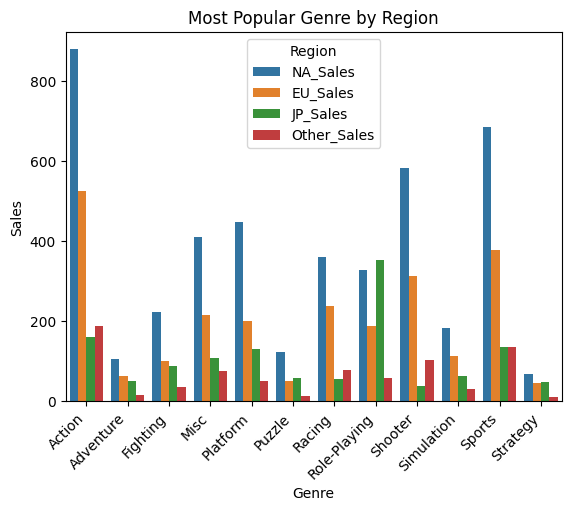

In [ ]:
genres = pd.melt(genres_by_region.reset_index(), id_vars="Genre", var_name="Region", value_name="Sales") # Prepares data for plotting

genre_by_region_plot = sns.barplot(genres,x="Genre",y="Sales", hue="Region")
genre_by_region_plot.set_title("Most Popular Genre by Region")
plt.xticks(rotation=45, ha="right");

### Question 6 Observation:
Action is the dominant genre in all regions except for Japan. A trend we first began to see back in Question 4. Japan's genre of choice being role playing games reflects well documented cultural differences in gaming preferences between Japanese and Western audiences.

### Question 7: How did global sales trend over time?

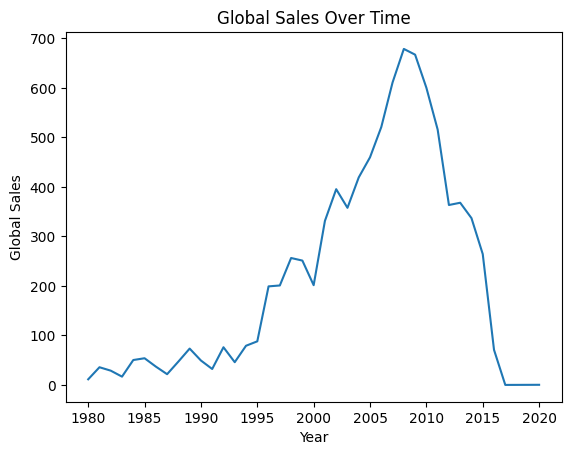

In [63]:
global_sales_per_year = df.groupby("Year")["Global_Sales"].sum().reset_index() # Used .reset_index() to change from a Series to a Dataframe for plotting

graph = sns.lineplot(global_sales_per_year,x="Year",y="Global_Sales")
graph.set_title("Global Sales Over Time")
graph.set_xlabel("Year")
graph.set_ylabel("Global Sales");

### Question 7 Observation:
Global game sales peaked around 2008-2009 before quickly declining. The drop after 2016 is likely partially explained by incomplete data in the dataset rather than an actual market collapse as the gaming industry has continued to grow through mobile and digital distribution channels.

## Conclusions
This analysis of over 16,000 video game titles reveals a number of interesting statistics about the global gaming industry from 1980-2020:

- The traditional video game market peaked in 2008-2009 before declining, likely driven by the rise of mobile gaming.
- Nintendo dominated early gaming history and maintained a strong presence across multiple platforms.
- Hardware bundles likely largely contributed to individual title sales figures, as seen with Wii Sports and Kinect Adventures.
- Japan represents a distinctly different market from Western regions, consistently preferring Role-Playing games over the Action titles that dominate NA and EU.
- The PS2 remains the most successful gaming platform by total software sales in history.

Limitations: The dataset appears incomplete for years after 2016, which affects the sales trend analysis. Something worth noting is that these sales figures reflect physical and early digital sales only and may not capture the full picture of the modern gaming market.